## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

momentum=095；nesterov=False

In [2]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟=0)
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [3]:
train, test = keras.datasets.cifar10.load_data()

In [4]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [5]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [6]:
"""Code Here
建立你的神經網路
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [7]:
"""Code Here
設定超參數
"""
## 超參數設定
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95

In [8]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=lr, nesterov=False, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

W0718 13:31:21.654728 10484 deprecation_wrapper.py:119] From C:\Users\Rosa\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:95: The name tf.reset_default_graph is deprecated. Please use tf.compat.v1.reset_default_graph instead.

W0718 13:31:21.656705 10484 deprecation_wrapper.py:119] From C:\Users\Rosa\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:98: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0718 13:31:21.715730 10484 deprecation_wrapper.py:119] From C:\Users\Rosa\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:102: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0718 13:31:21.717217 10484 deprecation_wrapper.py:119] From C:\Users\Rosa\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0718 13:31:21.723684 10484 depr

Experiment with LR = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


W0718 13:31:22.127110 10484 deprecation.py:323] From C:\Users\Rosa\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 15s 300us/step - loss: 2.0379 - acc: 0.2430 - val_loss: 1.9071 - val_acc: 0.2885
Epoch 2/50
50000/50000 [==============================] - 14s 274us/step - loss: 1.8895 - acc: 0.3096 - val_loss: 1.8782 - val_acc: 0.3214
Epoch 3/50
50000/50000 [==============================] - 14s 271us/step - loss: 1.8715 - acc: 0.3140 - val_loss: 1.8284 - val_acc: 0.3384
Epoch 4/50
50000/50000 [==============================] - 14s 288us/step - loss: 1.8602 - acc: 0.3225 - val_loss: 1.8721 - val_acc: 0.3117
Epoch 5/50
50000/50000 [==============================] - 14s 287us/step - loss: 1.8676 - acc: 0.3152 - val_loss: 1.9138 - val_acc: 0.2931
Epoch 6/50
50000/50000 [==============================] - 15s 291us/step - loss: 1.9080 - acc: 0.2978 - val_loss: 1.9490 - val_acc: 0.2865
Epoch 7/50
50000/50000 [==============================] - 15s 299us/step - loss: 1.9008 - acc: 0.2976 - val_loss: 1.

50000/50000 [==============================] - 16s 324us/step - loss: 1.8910 - acc: 0.3141 - val_loss: 1.7187 - val_acc: 0.3877
Epoch 2/50
50000/50000 [==============================] - 16s 316us/step - loss: 1.6906 - acc: 0.3981 - val_loss: 1.6371 - val_acc: 0.4160
Epoch 3/50
50000/50000 [==============================] - 14s 290us/step - loss: 1.5929 - acc: 0.4312 - val_loss: 1.6200 - val_acc: 0.4114
Epoch 4/50
50000/50000 [==============================] - 14s 277us/step - loss: 1.5444 - acc: 0.4489 - val_loss: 1.5462 - val_acc: 0.4467
Epoch 5/50
50000/50000 [==============================] - 14s 280us/step - loss: 1.4983 - acc: 0.4663 - val_loss: 1.4789 - val_acc: 0.4717
Epoch 6/50
50000/50000 [==============================] - 14s 280us/step - loss: 1.4389 - acc: 0.4862 - val_loss: 1.4894 - val_acc: 0.4659
Epoch 7/50
50000/50000 [==============================] - 14s 279us/step - loss: 1.4215 - acc: 0.4950 - val_loss: 1.4484 - val_acc: 0.4780
Epoch 8/50
50000/50000 [==============

Epoch 2/50
50000/50000 [==============================] - 23s 464us/step - loss: 1.8236 - acc: 0.3561 - val_loss: 1.7832 - val_acc: 0.3650
Epoch 3/50
50000/50000 [==============================] - 21s 422us/step - loss: 1.7416 - acc: 0.3824 - val_loss: 1.7043 - val_acc: 0.4034
Epoch 4/50
50000/50000 [==============================] - 21s 414us/step - loss: 1.6787 - acc: 0.4089 - val_loss: 1.6625 - val_acc: 0.4115
Epoch 5/50
50000/50000 [==============================] - 29s 575us/step - loss: 1.5097 - acc: 0.4670 - val_loss: 1.5267 - val_acc: 0.4572
Epoch 10/50
50000/50000 [==============================] - 25s 502us/step - loss: 1.4797 - acc: 0.4782 - val_loss: 1.5141 - val_acc: 0.4617
Epoch 11/50
50000/50000 [==============================] - 16s 322us/step - loss: 1.4587 - acc: 0.4851 - val_loss: 1.5067 - val_acc: 0.4584
Epoch 12/50
50000/50000 [==============================] - 16s 323us/step - loss: 1.4451 - acc: 0.4898 - val_loss: 1.4698 - val_acc: 0.4784
Epoch 13/50
50000/50000 

Epoch 7/50
50000/50000 [==============================] - 15s 299us/step - loss: 1.8859 - acc: 0.3400 - val_loss: 1.8729 - val_acc: 0.3447
Epoch 8/50
50000/50000 [==============================] - 15s 298us/step - loss: 1.8629 - acc: 0.3493 - val_loss: 1.8527 - val_acc: 0.3585
Epoch 9/50
50000/50000 [==============================] - 14s 285us/step - loss: 1.8433 - acc: 0.3561 - val_loss: 1.8348 - val_acc: 0.3605
Epoch 10/50
50000/50000 [==============================] - 14s 280us/step - loss: 1.8259 - acc: 0.3645 - val_loss: 1.8180 - val_acc: 0.3671
Epoch 11/50
50000/50000 [==============================] - 14s 290us/step - loss: 1.8109 - acc: 0.3691 - val_loss: 1.8044 - val_acc: 0.3729
Epoch 12/50
50000/50000 [==============================] - 15s 301us/step - loss: 1.7975 - acc: 0.3732 - val_loss: 1.7924 - val_acc: 0.3814
Epoch 13/50
50000/50000 [==============================] - 15s 297us/step - loss: 1.7851 - acc: 0.3783 - val_loss: 1.7808 - val_acc: 0.3826
Epoch 14/50
50000/50000

50000/50000 [==============================] - 11s 224us/step - loss: 2.2115 - acc: 0.2244 - val_loss: 2.2043 - val_acc: 0.2284
Epoch 8/50
50000/50000 [==============================] - 11s 224us/step - loss: 2.1981 - acc: 0.2346 - val_loss: 2.1911 - val_acc: 0.2369
Epoch 9/50
50000/50000 [==============================] - 12s 234us/step - loss: 2.1852 - acc: 0.2434 - val_loss: 2.1785 - val_acc: 0.2443
Epoch 10/50
50000/50000 [==============================] - 11s 227us/step - loss: 2.1728 - acc: 0.2476 - val_loss: 2.1664 - val_acc: 0.2508
Epoch 11/50
50000/50000 [==============================] - 11s 220us/step - loss: 2.1608 - acc: 0.2546 - val_loss: 2.1548 - val_acc: 0.2546
Epoch 12/50
50000/50000 [==============================] - 12s 239us/step - loss: 2.1493 - acc: 0.2591 - val_loss: 2.1436 - val_acc: 0.2602
Epoch 13/50
50000/50000 [==============================] - 11s 224us/step - loss: 2.1381 - acc: 0.2645 - val_loss: 2.1325 - val_acc: 0.2639
Epoch 14/50
50000/50000 [=========

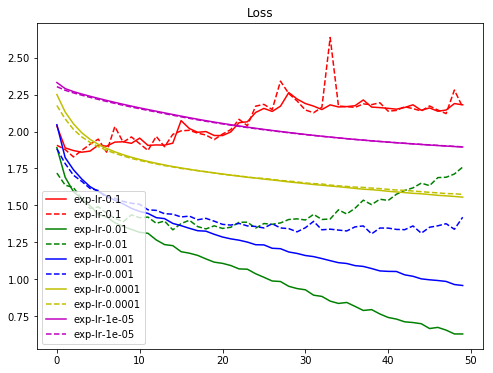

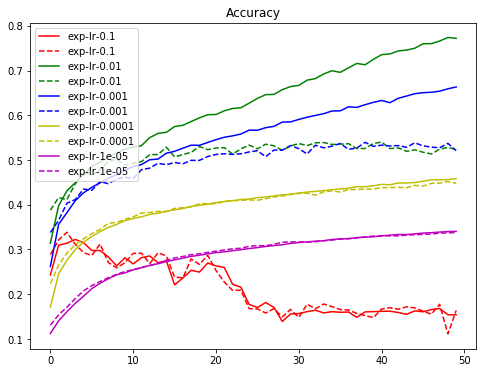

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()